In [298]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

def print_correlation(data):
    features = ['Open', 'Close', 'CPI', 'DXY', 'SPX','Fed Rate', 't']
    columns = []
    for x in features:
        row = []
        for y in features:
            correlation = data[x].corr(raw[y])
            row.append(correlation)
        columns.append(row)
    df = pd.DataFrame(columns, columns=[f'{j}' for j in features], index=[f'{i}' for i in features])
    print(df)
    
pd.set_option('display.expand_frame_repr', False) 
raw = pd.read_excel('raw.xlsx')
print_correlation(raw)

              Open     Close       CPI       DXY       SPX  Fed Rate         t
Open      1.000000  0.999838  0.888655 -0.192937  0.814556 -0.631044  0.005323
Close     0.999838  1.000000  0.889233 -0.192888  0.814802 -0.631770  0.005181
CPI       0.888655  0.889233  1.000000 -0.058422  0.912363 -0.693045 -0.018755
DXY      -0.192937 -0.192888 -0.058422  1.000000  0.183180  0.269753  0.008842
SPX       0.814556  0.814802  0.912363  0.183180  1.000000 -0.470129  0.014623
Fed Rate -0.631044 -0.631770 -0.693045  0.269753 -0.470129  1.000000  0.017682
t         0.005323  0.005181 -0.018755  0.008842  0.014623  0.017682  1.000000


              Open     Close       CPI       DXY       SPX  Fed Rate         t
Open      1.000000  0.999709  0.738450 -0.309495  0.551029 -0.574006  0.017888
Close     0.999709  1.000000  0.740640 -0.309614  0.552764 -0.576370  0.017674
CPI       0.738450  0.740640  1.000000 -0.058422  0.885345 -0.693045 -0.018755
DXY      -0.309495 -0.309614 -0.058422  1.000000  0.232019  0.269753  0.008842
SPX       0.551029  0.552764  0.885345  0.232019  1.000000 -0.463169  0.022938
Fed Rate -0.574006 -0.576370 -0.693045  0.269753 -0.463169  1.000000  0.017682
t         0.017888  0.017674 -0.018755  0.008842  0.022938  0.017682  1.000000


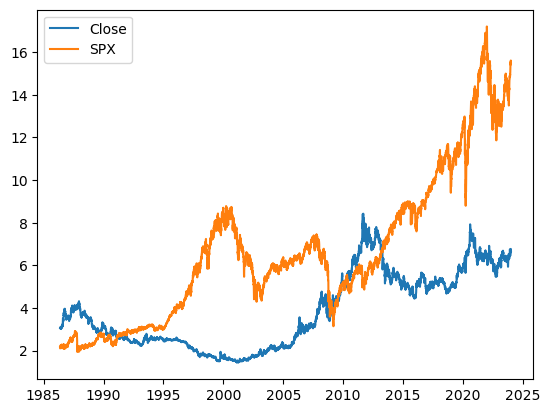

In [299]:
# Perform inflation adjustment
raw['Close'] = raw['Close']/raw['CPI']
raw['Open'] = raw['Open']/raw['CPI']
raw['SPX'] = raw['SPX']/raw['CPI']

plt.plot(raw['Date'], raw['Close'], label='Close')
plt.plot(raw['Date'], raw['SPX'], label='SPX')
plt.legend()
print_correlation(raw)

In [302]:
import numpy as np
import pandas as pd
from scipy.signal.windows import gaussian
from scipy.ndimage import convolve1d
from sklearn.preprocessing import MinMaxScaler
import torch

def process(columns):
    for column in columns:        
        # Fractionalise
        b = gaussian(20, 12)
        cleaned[column] = convolve1d(cleaned[column], b/b.sum())
        cleaned[column] = cleaned[column].pct_change()
        print("CLEANED")
#         w=[1]
#         d=0.9
#         for k in range(1,lags):
#             w.append(-w[-1]*((d-k+1))/k)
#         w=np.array(w).reshape(-1,1) 
#         res=0
#         for k in range(lags):
#             res += w[k]*cleaned[column].shift(k).fillna(0)
#         cleaned[column]=res[lags:]
        
def scale(columns):
    for column in columns:
        max_abs = np.max(np.abs(cleaned[column]))
        cleaned[column] = cleaned[column] / max_abs
        
def normalise(columns):
    for column in columns:
        cleaned[column] = cleaned[column] - np.mean(cleaned[column])
        
def change(columns):
    for column in columns:
        cleaned[column] = cleaned[column].pct_change() * 100
        
def stats(columns):
    for column in columns:
        print("column: ",column, "min: ",np.min(cleaned[column]),"max: ",np.max(cleaned[column]),"mean: ",np.mean(cleaned[column]))
        
cleaned = raw.copy()
lags=30
process(['Close'])
change(['CPI', 'SPX', 'DXY'])
scale(['Close','SPX', 'DXY', 'CPI', 'Fed Rate', 't'])
# normalise(['Close'])
stats(['Close','SPX', 'DXY', 'CPI', 'Fed Rate', 't'])
# cleaned['Open'] = np.log(cleaned['Open'].shift(-3) / cleaned['Open'])

cleaned = cleaned.iloc[:-3]
print(cleaned)

# test = raw.copy()
# test['Close'] = test['Close'][lags:].pct_change()
# max_abs = np.max(np.abs(test['Close']))
# test['Close'] = test['Close'] / max_abs

# plt.plot(test['Date'], test['Close'], label='Raw')
# plt.plot(cleaned['Date'], cleaned['Close'], label='Cleaned')
# plt.legend()
# print_correlation(cleaned)

CLEANED
column:  Close min:  -0.8412966225216567 max:  1.0 mean:  0.00628144549031351
column:  SPX min:  -1.0 max:  0.5233778953971547 mean:  0.0012873150338299224
column:  DXY min:  -1.0 max:  0.9462780294032065 mean:  0.00010821475837481248
column:  CPI min:  -0.6136365804876087 max:  1.0 mean:  0.003380209989290225
column:  Fed Rate min:  0.002473716759431045 max:  1.0 mean:  0.20026527939356908
column:  t min:  0.002688172043010753 max:  1.0 mean:  0.5062794512360592
      Unnamed: 0       Date  Fed Rate     Close  CPI      Open       DXY       SPX         t
0           1625 1986-05-15  0.432900       NaN  NaN  3.084253       NaN       NaN  0.373656
1           1626 1986-05-16  0.420532 -0.002575  0.0  3.087149  0.317414 -0.064213  0.376344
2           1627 1986-05-19  0.426098  0.002475  0.0  3.080543  0.213573 -0.034939  0.384409
3           1628 1986-05-20  0.424242 -0.004938  0.0  3.057919 -0.106108  0.009271  0.387097
4           1629 1986-05-21  0.430427  0.002063  0.0  3.046

In [293]:
cleaned = cleaned.iloc[1:]
print(cleaned)

      Unnamed: 0       Date  Fed Rate     Close  CPI      Open       DXY       SPX         t
1           1626 1986-05-16  0.420532 -0.002592  0.0  3.087149  0.317414 -0.064213  0.376344
2           1627 1986-05-19  0.426098  0.002491  0.0  3.080543  0.213573 -0.034939  0.384409
3           1628 1986-05-20  0.424242 -0.004971  0.0  3.057919 -0.106108  0.009271  0.387097
4           1629 1986-05-21  0.430427  0.002077  0.0  3.046606  0.180367  0.061202  0.389785
5           1630 1986-05-22  0.424861  0.023427  0.0  3.062624  0.338208 -0.013710  0.392473
...          ...        ...       ...       ...  ...       ...       ...       ...       ...
9779       11404 2023-12-21  0.329623  0.087336  0.0  6.616028  0.065345 -0.041627  0.973118
9780       11405 2023-12-22  0.329623  0.140587  0.0  6.669492 -0.205436  0.030761  0.975806
9781       11406 2023-12-25  0.329623  0.155479  0.0  6.697137  0.000000  0.000000  0.983871
9782       11407 2023-12-26  0.329623  0.133649  0.0  6.701734 -0.0360

In [305]:
import torch

torch.save(cleaned, open('cleaned.pt', 'wb'))

In [306]:
cleaned.to_excel('cleaned.xlsx', index=False)

In [214]:
cleaned['rolling'] = cleaned['Close'].rolling(window=30).mean()

# Function to determine the regime
def determine_regime(current_price, rolling_mean):
    if pd.isna(rolling_mean):
        return None  # Not enough data points to determine the regime
    elif current_price > rolling_mean:
        return 1
    else:
        return -1

# Apply the function to determine the regime
cleaned['regime'] = cleaned.apply(lambda row: determine_regime(row['Close'], row['rolling']), axis=1)

# def custom_function(df_part):
#     # Example: Calculate the difference between consecutive prices
#     w=[1]
#     d=0.8
#     for k in range(1,lags):
#         w.append(-w[-1]*((d-k+1))/k)
#     w=np.array(w).reshape(-1,1) 
#     res=0
#     for k in range(lags):
#         res += w[k]*df_part['Close'].shift(k).fillna(0)
#     df_part['Close'] = res[lags:]
#     return df_part

# # Split the DataFrame based on the 'signal' column
# df_positive = cleaned[cleaned['regime'] == 1].copy()
# df_negative = cleaned[cleaned['regime'] == -1].copy()

# # Apply the function to each part
# df_positive = custom_function(df_positive)
# df_negative = custom_function(df_negative)

# # Concatenate the DataFrames back together
# df_combined = pd.concat([df_positive, df_negative]).sort_index()

# # If needed, drop the intermediate 'price_transformed' column and keep only the original 'price' column
# cleaned['Close'] = df_combined['Close']

cleaned = cleaned.iloc[300:]
print(cleaned)

      Unnamed: 0       Date  Fed Rate     Close       CPI      Open       DXY       SPX         t   rolling  regime
300         1925 1987-07-17  0.405690 -0.061759  0.000000 -0.017586  0.285620  0.024048  0.545699 -0.003925    -1.0
301         1926 1987-07-20  0.411874  0.026554  0.000000 -0.031141  0.148471  0.025869  0.553763 -0.004661     1.0
302         1927 1987-07-21  0.406926  0.032183  0.000000  0.026812 -0.006586 -0.044843  0.556452 -0.001268     1.0
303         1928 1987-07-22  0.403216  0.030379  0.000000  0.041596  0.009878 -0.039617  0.559140 -0.003490     1.0
304         1929 1987-07-23  0.408163  0.003978  0.000000  0.010755 -0.062600 -0.000853  0.561828 -0.003719     1.0
...          ...        ...       ...       ...       ...       ...       ...       ...       ...       ...     ...
8480       10105 2018-12-26  0.148423 -0.017746  0.000000  0.080944 -0.122354 -0.068938  0.986559  0.015221    -1.0
8481       10106 2018-12-27  0.148423  0.060610  0.000000 -0.026587  0.1

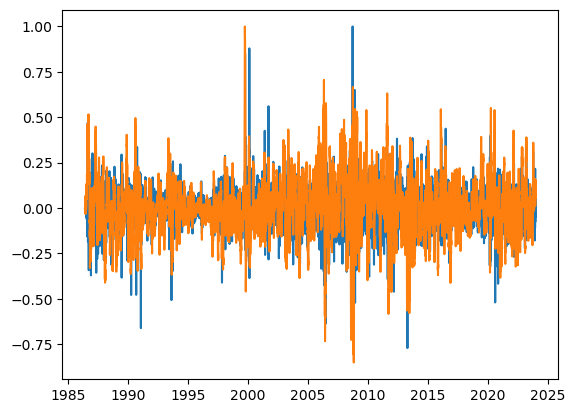

In [286]:
plt.plot(test['Date'], test['Close'], label='Raw')
plt.plot(cleaned['Date'], cleaned['Close'], label='Cleaned')

In [216]:
torch.save(cleaned, open('cleaned.pt', 'wb'))
cleaned.to_excel('cleaned.xlsx', index=False)

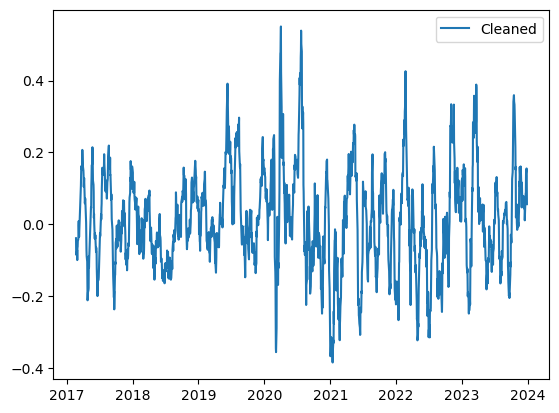

In [294]:
# plt.plot(raw['Close'], label='Raw')
plt.plot(cleaned['Date'][8000:],cleaned['Close'][8000:], label='Cleaned')
plt.legend()


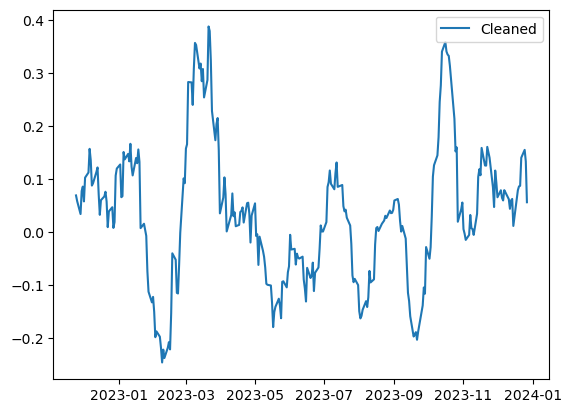

In [304]:
plt.plot(cleaned['Date'][9500:],cleaned['Close'][9500:], label='Cleaned')
plt.legend()
